In [10]:
from sympy import oo, Symbol, limit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def FV_N_m(PV, r_s, m, N):
    return PV * (1 + r_s/m)**(m*N)

def FV_c(PV, r_s, N):
    return PV * np.e**(r_s*N)

def FV_generic(PV, r_s, m, N):
    _m = Symbol('_m')
    return PV * limit((1 + r_s/_m)**(_m*N), _m, m).evalf()

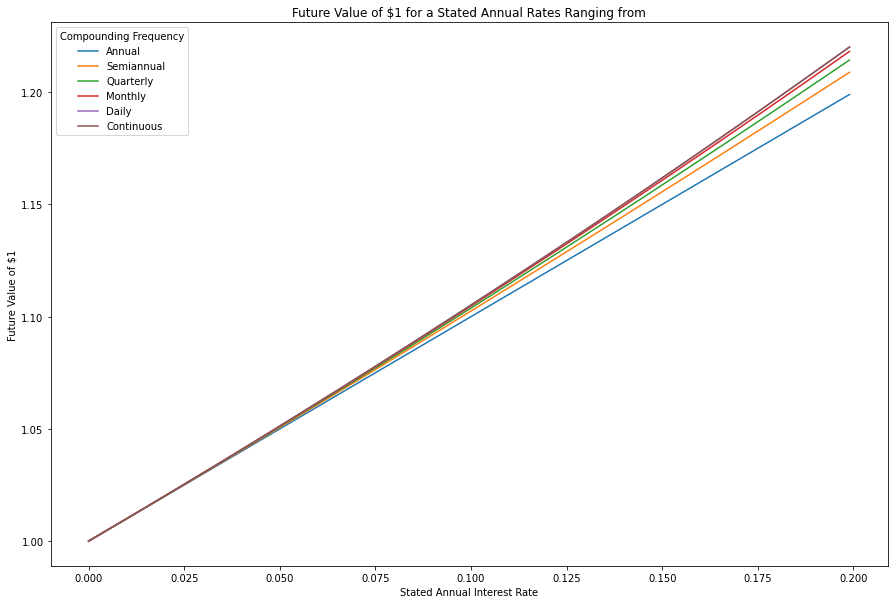

In [19]:
rates = np.arange(0, 0.2, .001)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()

frequencies = {'Annual': 1, 'Semiannual': 2, 'Quarterly': 4, 'Monthly': 12, 'Daily': 365, 'Continuous': oo}
for f in frequencies:
    ax.plot(rates, np.vectorize(FV_generic)(1, rates, frequencies[f], 1), label=f)

ax.set_title('Future Value of $1 Invested for 1 Period with Different Compounding Frequencies', )
ax.set_xlabel('Stated Annual Interest Rate')
ax.set_ylabel('Future Value of $1')
ax.legend()
ax.legend(title='Compounding Frequency')

plt.show()